In [ ]:
script_path = "/n/home02/amphillips/p26/scripts" # for cannon

#-------------- for working on my machine:
# script_path = '/Users/anyaphillips/Desktop/harvard/research/papers/p26/scripts'
# sys.path.append('/Users/anyaphillips/Downloads/software/petar_install/include')
# sys.path.append('/Users/anyaphillips/Desktop/harvard/research/papers/p26/scripts')
#--------------------

import sys
import petar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.table import Table
from scipy.stats import binned_statistic_2d

import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.dynamics import mockstream as ms

from gala.units import galactic

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
from matplotlib.lines import Line2D


from tqdm import tqdm

import pandas as pd

sys.path.append(script_path)
# from analyze_petar import analyze_petar
import PETAR_ANALYSIS_FUNCTIONS as paf
import astropy.constants as const
from streamframe import StreamFrame
from scipy.stats import binned_statistic
from matplotlib.gridspec import GridSpecFromSubplotSpec

import matplotlib.pyplot as plt

plt.style.use(script_path+'/vedant.mplstyle')
%config InlineBackend.figure_format='retina'

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit
from scipy.stats import binom


import io
from matplotlib.transforms import Bbox


/n/home02/amphillips/.conda/envs/petar_env/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [ ]:
paths = paf.define_paths()
simcolm_colors, hm_colors, simcolors = paf.define_simcolors()
time_cmap = paf.define_time_cmap()

init_displacements = paf.define_init_displacements()
apocenters = paf.define_apocenters()

# gather information

In [ ]:
dissolution_times, plotting_times_peri, plotting_times_apo = paf.get_tdis_tplot(paths)

0 13388 13388 13388
1 12893 12893 12893
2 10784 10784 10784
3 7298 7298 7298
4 13929 13929 13929
5 4885 4885 4885
6 7365 7365 7365
7 3065 3065 3065
8 10853 10499 10746
9 5929 5552 5798
10 11430 10990 11230
11 4321 4081 3834
12 10928 10488 10735
13 3354 3096 3342
14 7004 6549 6797
15 2468 2108 2354
16 5405 5164 5311
17 2399 2255 2110
18 5381 5169 5316
19 2776 2546 2693
20 3956 3710 3857
21 1364 1090 1236
22 2341 2257 2111
23 1315 1089 1235


### initial velocity dispersion, dynamical, relaxation timescales

In [ ]:
#### initial half-mass relaxation times
t_rh0 = []
sigv0 = []
t_dyn0 = []
i_list = np.array([0])

npz_path = "/n/holystore01/LABS/conroy_lab/Lab/amphillips/finished_grid/structure_npzs_REAL/" 

for n in range(len(paths)):
    rh, nbound, mbound, t_rh, t_dyn, t_dis = paf.compute_cluster_structure( 
        paths[n], i_list, init_displacements[n],
        density_shell_width=0.5 # a .4 pc shell about the half-mass radius is used to compute the density -> crossing time -> relaxation time.
    )
    t_rh0.append(int(t_rh[0]))
    t_dyn0.append(t_dyn[0])

    dat = np.load(npz_path+"%i_structure.npz"%n)
    disp_3d = dat['dispersion_rtid'][0]
    disp_1d = disp_3d/np.sqrt(3)
    sigv0.append(round(disp_1d,2))
        
# print(t_rh0)
# print(sigv0)

100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


#### plotting example streams to show gradual dissolution

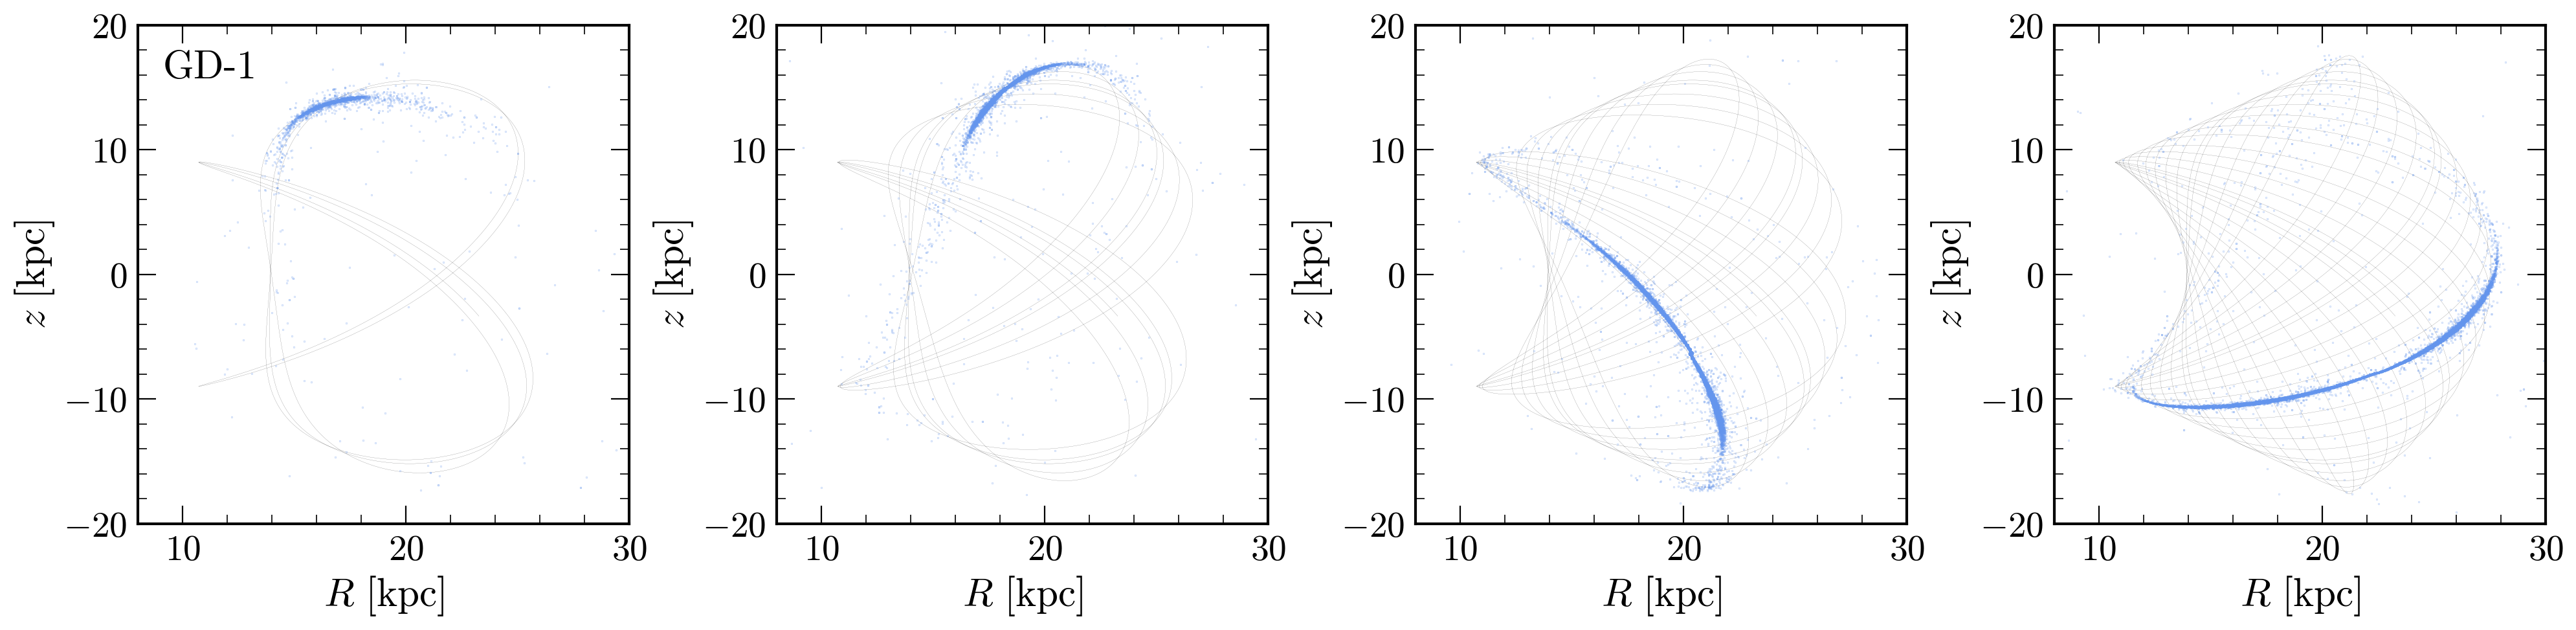

In [7]:
### for an example simulation, plot the orbit in z vs R at 0.5, 0.75, 1 * dissolution time

fig, axs = plt.subplots(1,4,figsize=[24,5])
plt.subplots_adjust(wspace=0.3)
t_tdis_fracs = [0.25, 0.5, 0.75, 1.0]
tdis = dissolution_times[8]
path = paths[8]

ip = init_displacements[8]
pos0 = ip[:3] * u.kpc
vel0 = ip[3:] * u.km/u.s
w0 = gd.PhaseSpacePosition(pos0, vel0)
mwp = gp.BovyMWPotential2014(units=galactic)
H = gp.Hamiltonian(mwp)

for j in range(len(t_tdis_fracs)):
    i = int(tdis * t_tdis_fracs[j])
    ax = axs[j]
    # ax.set_title(r"$t=%.2f\ t_{\rm{dis}}$"%t_tdis_fracs[j])

    ax.set_xlabel(r"$R\ \rm{[kpc]}$")
    ax.set_ylabel(r"$z\ \rm{[kpc]}$")

    particles = paf.load_particle(path, i)
    pos, vel = paf.CM_to_galcen_frame(path, particles, i)
    x,y,z = pos.T.to(u.kpc)
    R = np.sqrt(x**2 + y**2)
    ax.scatter(R, z, s=.01, rasterized=True, c='cornflowerblue')

    int_time = i
    dt = 1
    orbit = H.integrate_orbit(w0, dt=dt, n_steps=int_time/dt)
    x,y,z = orbit.pos.x, orbit.pos.y, orbit.pos.z
    r=np.sqrt(x**2 + y**2)
    ax.plot(r, z, c='k', lw=0.05, zorder=0)

    ax.set_xlim(8, 30)
    ax.set_ylim(-20,20)

axs[0].text(0.05, 0.95, "GD-1", ha='left', va='top', transform=axs[0].transAxes)

plt.savefig("plots/orbit_visualization_GD1.pdf", bbox_inches="tight")


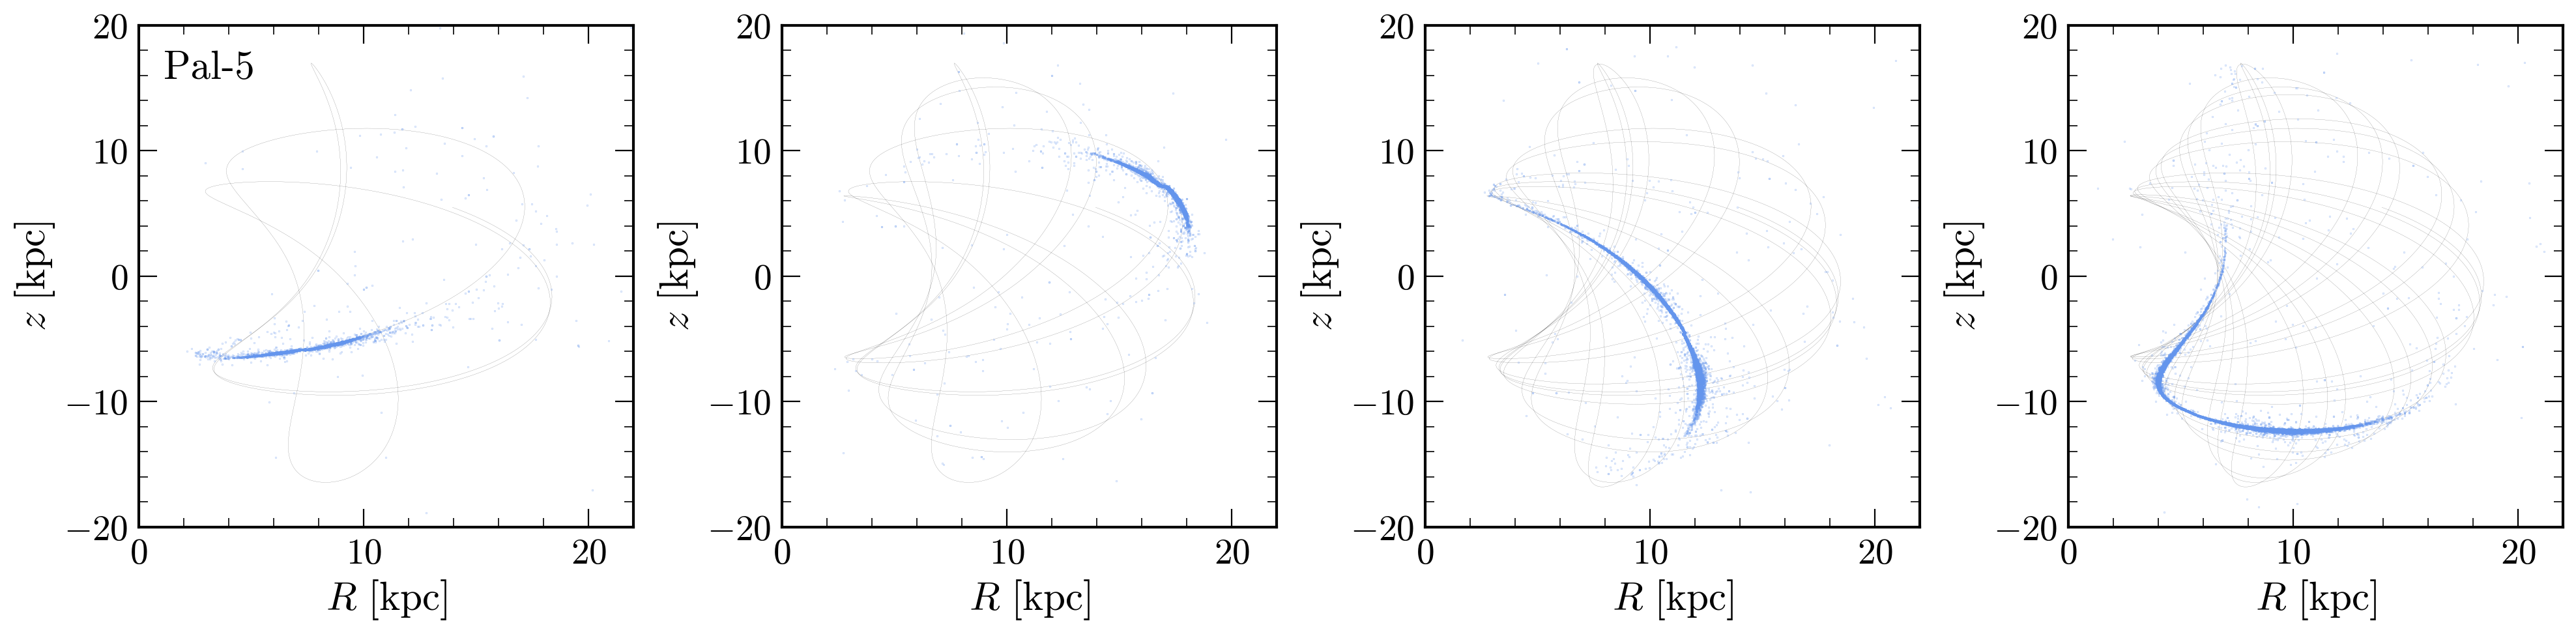

In [8]:
### for a pal-5 orbit; sim 16 as an example
fig, axs = plt.subplots(1,4,figsize=[24,5])
plt.subplots_adjust(wspace=0.3)
t_tdis_fracs = [0.25, 0.5, 0.75, 1.0]
tdis = dissolution_times[16]
path = paths[16]

ip = init_displacements[16]
pos0 = ip[:3] * u.kpc
vel0 = ip[3:] * u.km/u.s
w0 = gd.PhaseSpacePosition(pos0, vel0)
mwp = gp.BovyMWPotential2014(units=galactic)
H = gp.Hamiltonian(mwp)

for j in range(len(t_tdis_fracs)):
    i = int(tdis * t_tdis_fracs[j])
    ax = axs[j]
    # ax.set_title(r"$t=%.2f\ t_{\rm{dis}}$"%t_tdis_fracs[j])

    ax.set_xlabel(r"$R\ \rm{[kpc]}$")
    ax.set_ylabel(r"$z\ \rm{[kpc]}$")

    particles = paf.load_particle(path, i)
    pos, vel = paf.CM_to_galcen_frame(path, particles, i)
    x,y,z = pos.T.to(u.kpc)
    R = np.sqrt(x**2 + y**2)
    ax.scatter(R, z, s=.01, rasterized=True, c='cornflowerblue')

    int_time = i
    dt = 1
    orbit = H.integrate_orbit(w0, dt=dt, n_steps=int_time/dt)
    x,y,z = orbit.pos.x, orbit.pos.y, orbit.pos.z
    r=np.sqrt(x**2 + y**2)
    ax.plot(r, z, c='k', lw=0.05,zorder=0)

    ax.set_xlim(0, 22)
    ax.set_ylim(-20,20)

axs[0].text(0.05, 0.95, "Pal-5", ha='left', va='top', transform=axs[0].transAxes)

plt.savefig("plots/orbit_visualization_pal5.pdf",dpi=300, bbox_inches="tight")


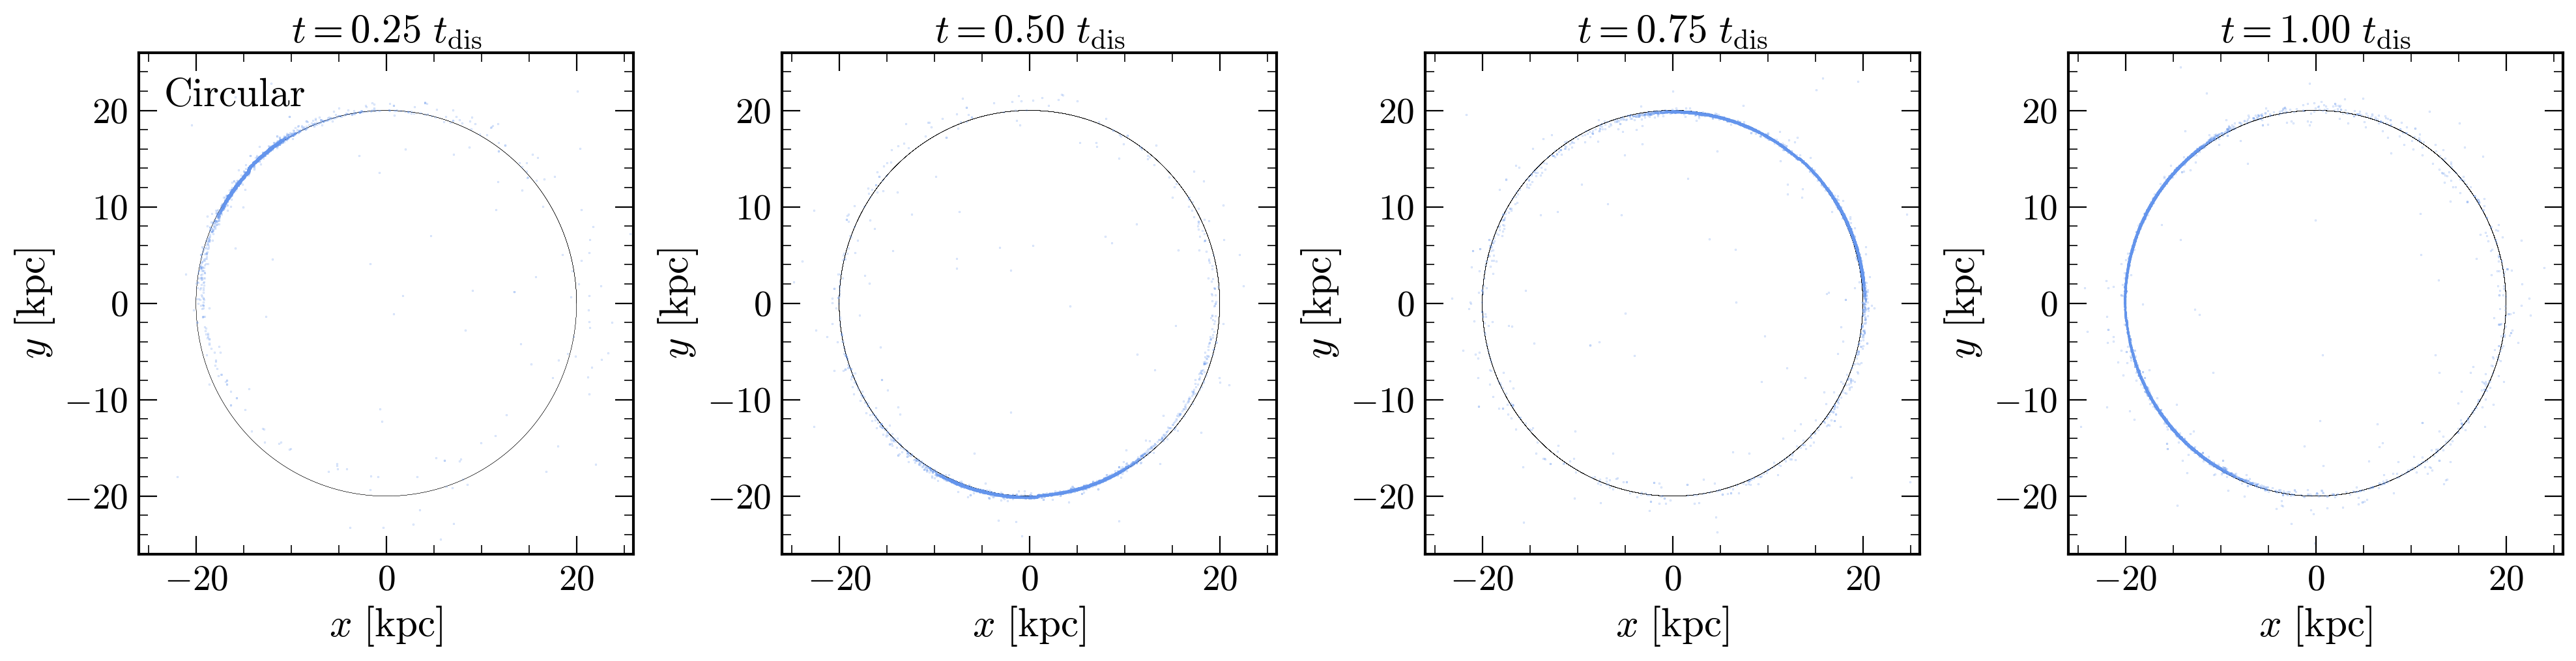

In [9]:
### for a circular orbit; sim 0 as an example
fig, axs = plt.subplots(1,4,figsize=[24,5])
plt.subplots_adjust(wspace=0.3)
t_tdis_fracs = [0.25, 0.5, 0.75, 1.0]
tdis = dissolution_times[0]
path = paths[0]

ip = init_displacements[0]
pos0 = ip[:3] * u.kpc
vel0 = ip[3:] * u.km/u.s
w0 = gd.PhaseSpacePosition(pos0, vel0)
mwp = gp.BovyMWPotential2014(units=galactic)
H = gp.Hamiltonian(mwp)

for j in range(len(t_tdis_fracs)):
    i = int(tdis * t_tdis_fracs[j])
    ax = axs[j]
    ax.set_title(r"$t=%.2f\ t_{\rm{dis}}$"%t_tdis_fracs[j])

    ax.set_xlabel(r"$x\ \rm{[kpc]}$")
    ax.set_ylabel(r"$y\ \rm{[kpc]}$")

    particles = paf.load_particle(path, i)
    pos, vel = paf.CM_to_galcen_frame(path, particles, i)
    x,y,z = pos.T.to(u.kpc)
    R = np.sqrt(x**2 + y**2)
    ax.scatter(x, y, s=.01, rasterized=True, c='cornflowerblue')

    int_time = i
    dt = 1
    orbit = H.integrate_orbit(w0, dt=dt, n_steps=int_time/dt)
    x,y,z = orbit.pos.x, orbit.pos.y, orbit.pos.z
    r=np.sqrt(x**2 + y**2)
    ax.plot(x, y, c='k', lw=0.05, zorder=0)

    ax.set_xlim(-26, 26)
    ax.set_ylim(-26,26)

axs[0].text(0.05, 0.95, "Circular", ha='left', va='top', transform=axs[0].transAxes)

plt.savefig("plots/orbit_visualization_circ.pdf",dpi=300, bbox_inches="tight")


# table + dissolution times plot

In [9]:
# check N_o/b and M_o/b for the low- and high-mass sims

particles_lm = paf.load_particle(paths[2], i=0)
particles_hm = paf.load_particle(paths[3], i=0)

M_cut = 8.

masses_lm = particles_lm.mass
Mclust_lm = np.sum(masses_lm)
moblm = masses_lm[masses_lm>=M_cut]

masses_hm = particles_hm.mass
mobhm = masses_hm[masses_hm>=M_cut]
Mclust_hm = np.sum(masses_hm)

Mob_lm = np.sum(moblm)
Nob_lm = len(moblm)

Mob_hm = np.sum(mobhm)
Nob_hm = len(mobhm)

print("low mass:", Mob_lm, "Msun / ", Nob_lm, "stars / ", "total mass %i Msun"%Mclust_lm)
print("high mass:", Mob_hm, "Msun / ", Nob_hm, "stars / ", "total mass %i Msun"%Mclust_hm)

low mass: 1621.4203374590418 Msun /  86 stars /  total mass 8499 Msun
high mass: 2915.5300613230265 Msun /  137 stars /  total mass 9940 Msun


In [10]:
### GO THROUGH AND COMPUTE ALL THE HALF MASS RADII!!!! * ??with energy argument?
Rh0s = []


for n, path in tqdm(enumerate(paths)):
    # particles = paf.load_particle(path, i=0)
    # x,y,z = particles.pos.T
    # r = np.sqrt(x**2 + y**2 + z**2)
    # m = particles.mass
    # rh = paf.calculate_half_mass_radius(m,r)
    # Rh0s.append(rh)
    dat = np.load(npz_path+"%i_structure.npz"%n)
    rh = dat['rh_energy'][0] # so that this is defined consistently with the structural evolution plot. 
    Rh0s.append(rh)

    
print(Rh0s)

24it [00:00, 1061.85it/s]

[np.float64(0.6339645004711071), np.float64(0.6373562790802306), np.float64(1.276657155981781), np.float64(1.3197284356987122), np.float64(2.3600081978488885), np.float64(2.5472384631569587), np.float64(4.616758253115269), np.float64(5.014094400848073), np.float64(0.6339645004711071), np.float64(0.6373562790802306), np.float64(1.276657155981781), np.float64(1.3197284356987122), np.float64(2.3600081978488885), np.float64(2.5472384631569587), np.float64(4.616758253115269), np.float64(5.014094400848073), np.float64(0.6339645004711071), np.float64(0.6373562790802306), np.float64(1.276657155981781), np.float64(1.3197284356987122), np.float64(2.3600081978488885), np.float64(2.5472384631569587), np.float64(4.616758253115269), np.float64(5.014094400848073)]


In [12]:
not_skipped = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

orbit_names = ["Circular"]*8 + ["GD-1"]*8 + ["Pal-5"]*8
orbit_names = np.array(orbit_names)

Rvir0 = [0.75]*2 + [1.5]*2 + [3.]*2 + [6.]*2
Rvir0 *= 3
Rvir0 = np.array(Rvir0)

Nob = [Nob_lm, Nob_hm] * 12
Nob = np.array(Nob)
Mob = [Mob_lm, Mob_hm] * 12
Mob = np.array(Mob)

Mclust0 = [Mclust_lm, Mclust_hm]*12
Mclust0 = np.array(Mclust0)


avg_dissolution_time = [" "] * 8 + [11100, 9540] + [" "]*4 + [7060, 2850] + [" "]*8
disp_dissolution_time = [" "] * 8 + [2400, 3320] + [" "]*4 + [830, 770] + [" "]*8


out = io.StringIO()

table_labels = [r"\texttt{"+label+r"}" for label in labels]

table_dict = {
    # r'Label':table_labels,
    r'Orbit':orbit_names,
    r'$R_{\rm{vir},0}\ (\rm{pc})$':Rvir0,
    r'$R_{h,0}':np.round(Rh0s,2),
    r'$N_{\rm{OB}}$':Nob,
    r'$M_{\rm{OB}}\ (M_{\odot})$':Mob.astype(int),
    r'$M_{\rm{clust},0}$':Mclust0.astype(int),
    r'$t_{\rm{dyn},0}$ (Myr)':np.round(t_dyn0, 1),
    r'$t_{\rm{rh},0}\ (\rm{Myr})$':np.array(t_rh0).astype(int),
    r'$\sigma_{v,0}$':np.array(sigv0),
    r'$t_{\rm{dis}}\ (\rm{Myr})$':dissolution_times,
    r'$t_{\rm{plot}}\ (\rm{Myr})$':plotting_times_peri,
    r'tdis_avg':avg_dissolution_time,
    r'sigma_tdis':disp_dissolution_time
}
t=Table(table_dict)
t.write(out, format='ascii.latex')
print(out.getvalue())

\begin{table}
\begin{tabular}{ccccccccccccc}
Orbit & $R_{\rm{vir},0}\ (\rm{pc})$ & $R_{h,0} & $N_{\rm{OB}}$ & $M_{\rm{OB}}\ (M_{\odot})$ & $M_{\rm{clust},0}$ & $t_{\rm{dyn},0}$ (Myr) & $t_{\rm{rh},0}\ (\rm{Myr})$ & $\sigma_{v,0}$ & $t_{\rm{dis}}\ (\rm{Myr})$ & $t_{\rm{plot}}\ (\rm{Myr})$ & tdis_avg & sigma_tdis \\
Circular & 0.75 & 0.63 & 86 & 1621 & 8499 & 0.4 & 66 & 1.46 & 13388 & 13388 &  &  \\
Circular & 0.75 & 0.64 & 137 & 2915 & 9940 & 0.4 & 61 & 1.36 & 12893 & 12893 &  &  \\
Circular & 1.5 & 1.28 & 86 & 1621 & 8499 & 1.0 & 156 & 1.01 & 10784 & 10784 &  &  \\
Circular & 1.5 & 1.32 & 137 & 2915 & 9940 & 1.0 & 148 & 0.98 & 7298 & 7298 &  &  \\
Circular & 3.0 & 2.36 & 86 & 1621 & 8499 & 2.8 & 431 & 0.81 & 13929 & 13929 &  &  \\
Circular & 3.0 & 2.55 & 137 & 2915 & 9940 & 2.7 & 427 & 0.78 & 4885 & 4885 &  &  \\
Circular & 6.0 & 4.62 & 86 & 1621 & 8499 & 8.2 & 1273 & 0.57 & 7365 & 7365 &  &  \\
Circular & 6.0 & 5.01 & 137 & 2915 & 9940 & 6.7 & 1050 & 0.61 & 3065 & 3065 &  &  \\
GD-1 &

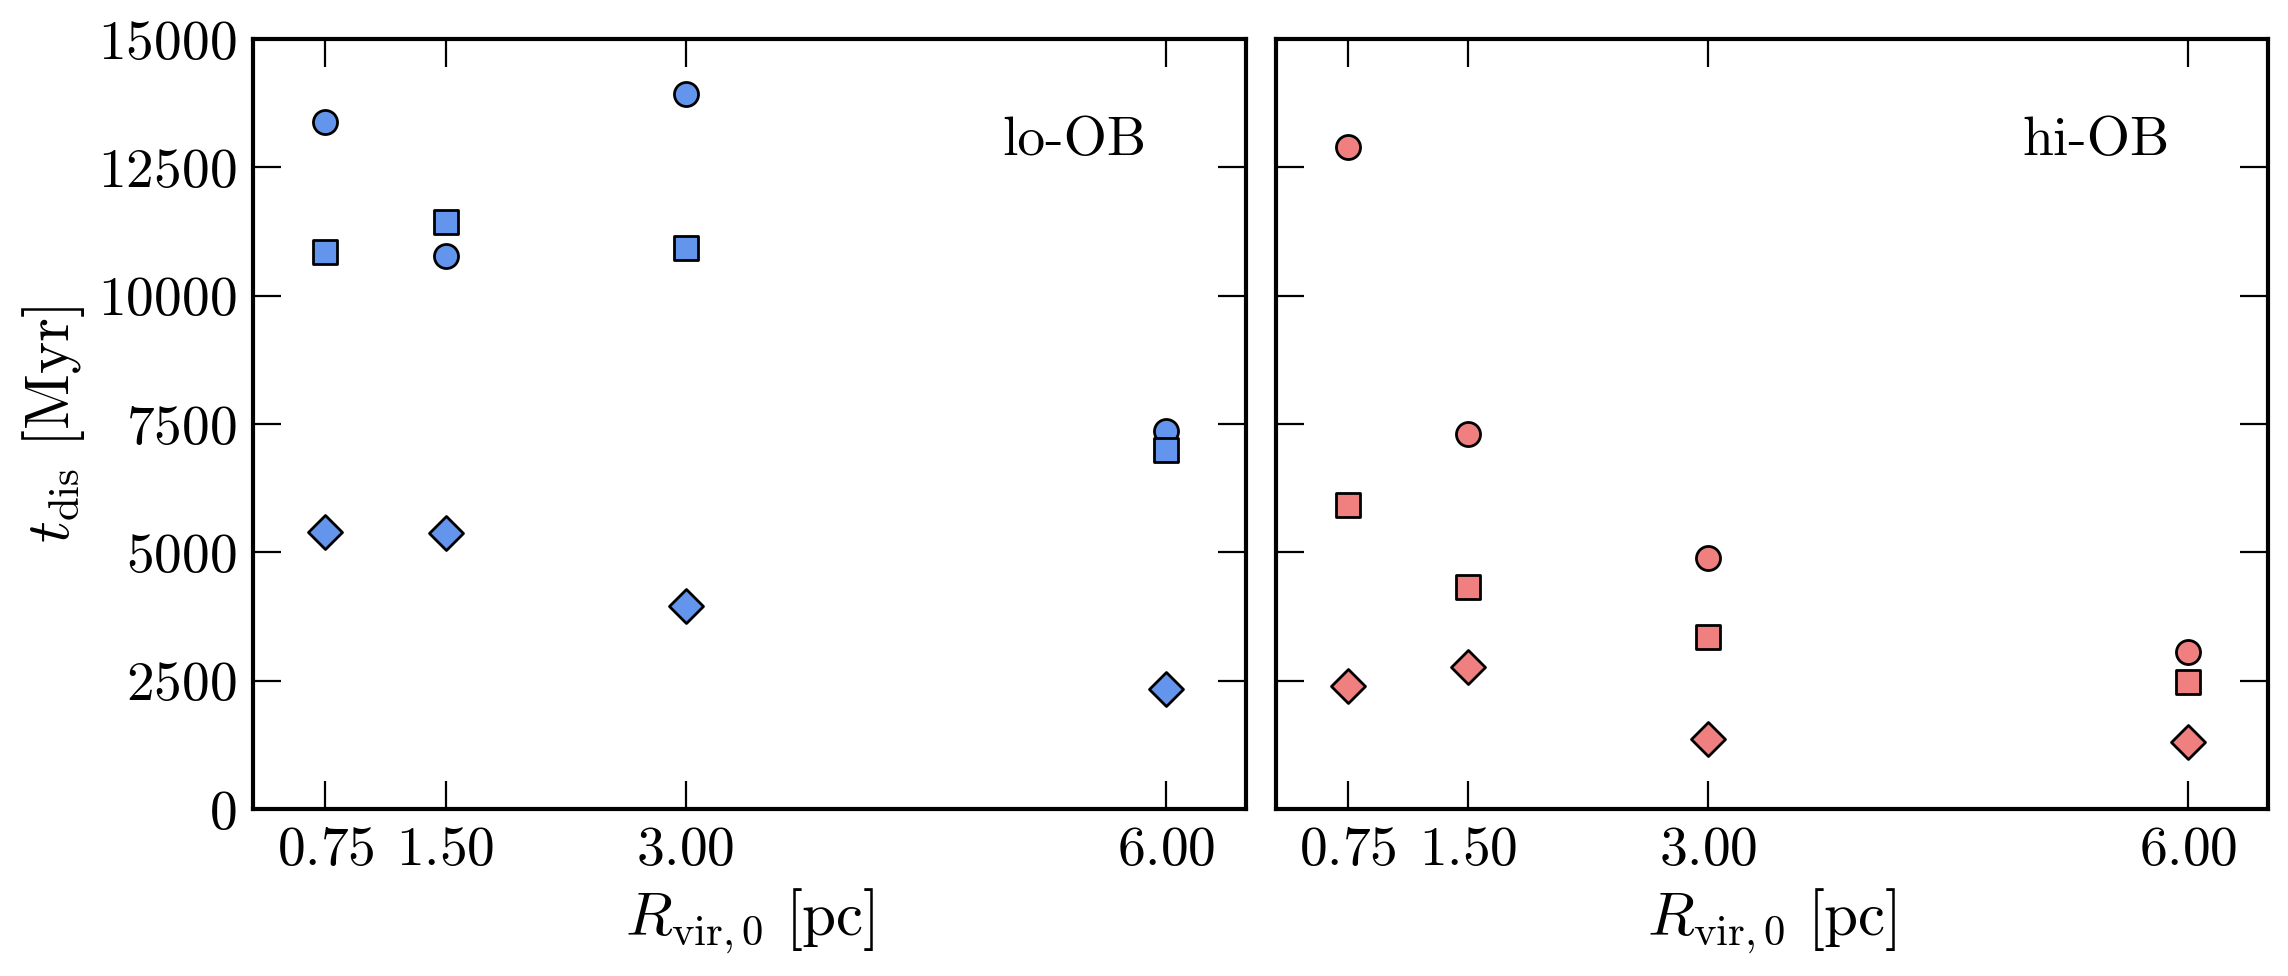

In [14]:
fig, axs = plt.subplots(1,2,figsize=[13,5], sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.03, wspace=0.03)

select_circ = [True]*4 + [False]*8
select_gd1 = [False]*4 + [True]*4 + [False]*4
select_pal5 = [False]*8 + [True]*4

mass_flag = np.array([0,1]*12)
axs[0].scatter(Rvir0[mass_flag==0][select_circ], np.array(dissolution_times)[mass_flag==0][select_circ],
           c='cornflowerblue', marker='o', label='circ, low mass', s=75, edgecolor='k',
              rasterized=True)
axs[0].scatter(Rvir0[mass_flag==0][select_gd1], np.array(dissolution_times)[mass_flag==0][select_gd1],
           c='cornflowerblue', marker='s', label='gd-1, low mass', s=75, edgecolor='k',
              rasterized=True)
axs[0].scatter(Rvir0[mass_flag==0][select_pal5], np.array(dissolution_times)[mass_flag==0][select_pal5],
           c='cornflowerblue', marker='D', label='pal-5, low mass', s=75, edgecolor='k',
              rasterized=True)

axs[1].scatter(Rvir0[mass_flag==1][select_circ], np.array(dissolution_times)[mass_flag==1][select_circ],
           c='lightcoral', marker='o', label='circ, high mass', s=75, edgecolor='k',
              rasterized=True)
axs[1].scatter(Rvir0[mass_flag==1][select_gd1], np.array(dissolution_times)[mass_flag==1][select_gd1],
           c='lightcoral', marker='s', label='gd-1, high mass', s=75, edgecolor='k',
              rasterized=True)
axs[1].scatter(Rvir0[mass_flag==1][select_pal5], np.array(dissolution_times)[mass_flag==1][select_pal5],
           c='lightcoral', marker='D', label='pal-5, high mass', s=75, edgecolor='k',
              rasterized=True)


# build proxy artists for the legend
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None',
           markerfacecolor='white', markeredgecolor='black',
           markersize=10, label='Circular'),
    Line2D([0], [0], marker='s', linestyle='None',
           markerfacecolor='white', markeredgecolor='black',
           markersize=10, label='GD-1'),
    Line2D([0], [0], marker='D', linestyle='None',
           markerfacecolor='white', markeredgecolor='black',
           markersize=10, label='Pal-5'),
]

# place the legend on the right side of the right subplot
# axs[1].legend(handles=legend_elements,
#               loc='upper left',
#               bbox_to_anchor=(1.05, 1),
#               borderaxespad=0.,
#               title="Orbit")



# fig.text(0.5, -.05, r"$R_{\rm{vir},0}\ (\rm{pc})$", ha='center')#, fontsize=20)
for ax in axs:
   ax.set_xlabel(r"$R_{\rm{vir},0}\ \rm [pc]$")

axs[0].set_ylabel(r"$t_{\rm{dis}}\ \rm [Myr]$")
# fig.text(0.04, 0.5, r"$t_{\rm{dis}}\ (\rm{Myr})$", va='center', rotation='vertical')#,
#          # fontsize=20)

axs[0].text(0.9,0.9, "lo-OB", #r"$N_{\rm OB}=86$",
            ha='right', va='top', fontsize=20,
            transform=axs[0].transAxes)
axs[1].text(0.9,0.9, "hi-OB", #r"$N_{\rm OB}=137$",
           ha='right', va='top',fontsize=20,
           transform=axs[1].transAxes)

axs[0].set_ylim(0.0,15000)
axs[0].set_xlim(0.3,6.5)
for ax in axs:
    ax.set_xticks([0.75, 1.5, 3., 6.])
    ax.minorticks_off()
    
plt.savefig("plots/dissolution_time_summary.pdf", dpi=300, bbox_inches="tight")

# aside: find the peri/apocenters of different orbits

to log in the paf script for easy importing to other notebooks.

In [22]:
### what are the peri/apocenters of the different orbits??

gd1_w0 = np.load('/n/home02/amphillips/binaries_in_streams/initial_conditions/GD1_progenitor.npy',
                 allow_pickle=True).item()
pos = gd1_w0.pos.xyz.to(u.pc)
vel = gd1_w0.vel.d_xyz.to(u.km/u.s)

mwp = gp.BovyMWPotential2014(units=galactic)
H = gp.Hamiltonian(mwp)

int_time=15000
dt = 1
orbit=H.integrate_orbit(gd1_w0, dt=-dt, n_steps=int_time/dt)

gd1_peri, gd1_apo, gd1_e = orbit.pericenter(), orbit.apocenter(), orbit.eccentricity()
print(gd1_peri, gd1_apo, gd1_e)

13.955336058662287 kpc 27.588140995421444 kpc 0.32815753286637933


In [23]:
(gd1_apo-gd1_peri)/(gd1_apo+gd1_peri)

<Quantity 0.32815753>

In [24]:
c = coord.ICRS(ra=229 * u.deg, dec=-0.124 * u.deg,
               distance=22.9 * u.kpc,
               pm_ra_cosdec=-2.296 * u.mas/u.yr,
               pm_dec=-2.257 * u.mas/u.yr,
               radial_velocity=-58.7 * u.km/u.s)

# idk why the above isn't working, so define the galactocentric frame manually:
galcen_frame = coord.Galactocentric(
    galcen_distance=8.122 * u.kpc,
    z_sun=20.8  * u.pc,
    galcen_v_sun=coord.CartesianDifferential([12.9, 245.6, 7.78] * u.km/u.s)
)

# Transform
c_gc = c.transform_to(galcen_frame).cartesian

pal5_w0 = gd.PhaseSpacePosition(c_gc)

int_time=10000
dt = 1
mwp = gp.BovyMWPotential2014(units=galactic)
H=gp.Hamiltonian(mwp)
orbit=H.integrate_orbit(pal5_w0, dt=-dt, n_steps=int_time/dt)

pal5_peri, pal5_apo, pal5_e = orbit.pericenter(), orbit.apocenter(), orbit.eccentricity()
print(pal5_peri, pal5_apo, pal5_e)

6.793653684830213 kpc 18.554661940128103 kpc 0.46397592760435064
